In [10]:
import os

from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

sns.set_theme(style="whitegrid")
import numpy as np
import pandas as pd


from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
from yellowbrick.cluster import silhouette_visualizer

In [11]:
from settings import PATH, DATABASE_PATH
csv = "penguins_size.csv"

In [12]:
df = pd.read_csv(os.path.join(DATABASE_PATH, csv))
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
df.replace('.', float('NAN'), inplace=True)
df = df.dropna(how="all")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
x = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]
y = df['species']

In [15]:
print(x)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
3                 NaN              NaN                NaN          NaN
4                36.7             19.3              193.0       3450.0
..                ...              ...                ...          ...
339               NaN              NaN                NaN          NaN
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[344 rows x 4 columns]


In [16]:
print(y)

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object


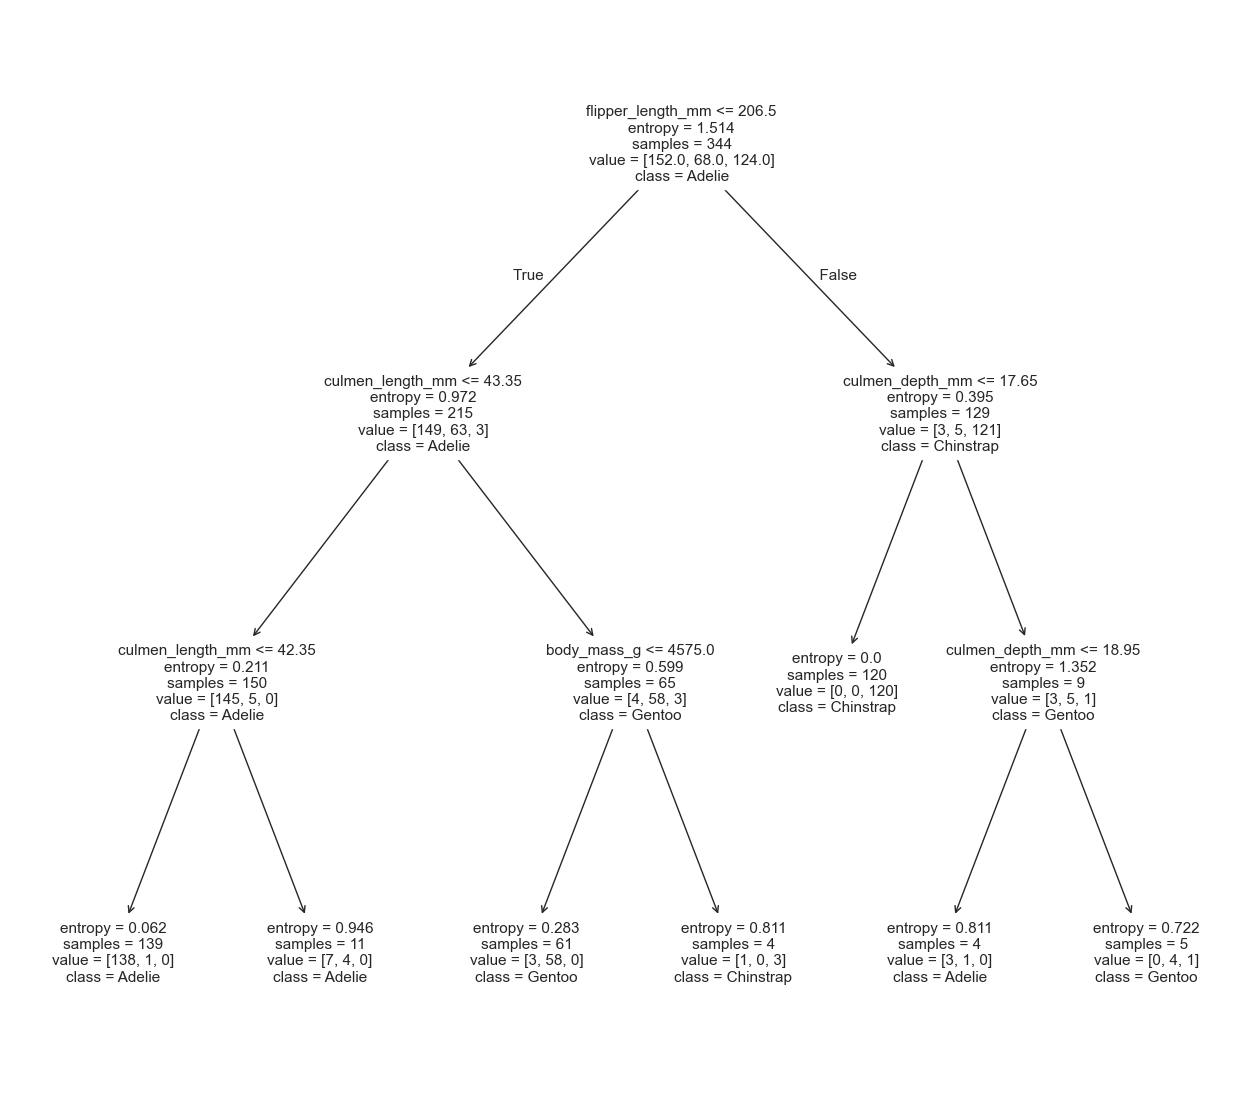

In [17]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt_model = dt.fit(x, y)
fig = plt.figure(figsize=(16, 14))
tree.plot_tree(dt_model, feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], class_names=['Adelie', 'Gentoo', 'Chinstrap'])
plt.show()